# Unsupervised Learning
### Goal of lesson
- Understand how Unsupervised Learning is different from Supervised Learning
- How it can organize data without knowledge
- Understand how $k$-Means Clustering works
- Train a $k$-Means Cluster model

### What is Unsupervised Learning?
- Given input data without any additional feedback - learn patterns
- The third large group of Machine Learning

### Clustering
- Organize a set of objects into groups in such a way that similar objects tend to be in the same group

### $k$-Means Clustering
- Algorithm for clustering data based on repeatedly assigning points to clusters and updating those clusters' centers.

![K Means Clustering](img/k_means.png)

> #### Programming Notes:
> - Libraries used
>     - [**pandas**](https://pandas.pydata.org) - a data analysis and manipulation tool
>     - [**numpy**](http://numpy.org) - scientific computing with Python ([Lecture on NumPy](https://youtu.be/BpzpU8_j0-c))
>     - [**matplotlib**](http://matplotlib.org) - visualization with Python ([Lecture on **visualization**](https://youtu.be/htIh8YHh4xs))
>     - [**sklearn**](https://scikit-learn.org/stable/) - tools for predictive data analysis
> - Functionality and concepts used
>     - [**KMeans**](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) to train (fit) the model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans

In [4]:
# Generate some numbers
data = np.random.randn(400, 2)
data[:100] += 5,5
data[100:200] += 10,10
data[200:300] += 10, 5
data[300:] += 5, 10


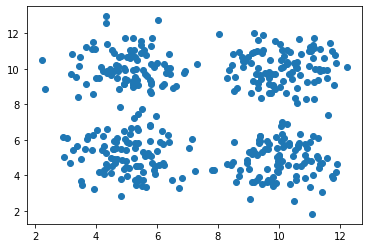

In [6]:
# all the data points
# kind of grouped in 4 groups
# each groups has a centroid
# kmeans가 
fig, ax = plt.subplots()
ax.scatter(x=data[:, 0], y=data[:, 1])

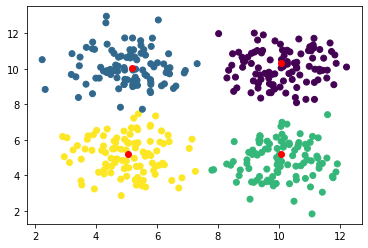

In [11]:
model = KMeans(n_clusters=4, init='random', random_state=42, max_iter=1) # cluster가 4개

# random으로 설정하지 않았으면 max_iter=1이어도 결과가 매우 좋았을 것이다.
# 여기서 결과란 centroid가 각 group의 어디에 위치하는가이다.
# centroid가 그룹의 중앙에 있으면 클러스터링이 잘된 것이고
# 그룹의 중앙에 있지 않으면 max_iter를 더 키워봐야 한다.
# max_iter=1에서 1씩 증가시켜볼 것.
# 각 그룹은 색이 다르다.

# kmeans ++

# centroid는 그룹에 속하는 포인트의 평균값으로 움직인다
# reproducibility
model.fit(data)
y_pred = model.predict(data)
fig, ax = plt.subplots()
ax.scatter(x=data[:, 0], y=data[:, 1], c=y_pred)
ax.scatter(x=model.cluster_centers_[:, 0],
          y=model.cluster_centers_[:, 1], c='r') # centroid의 정확한 위치를 visualize

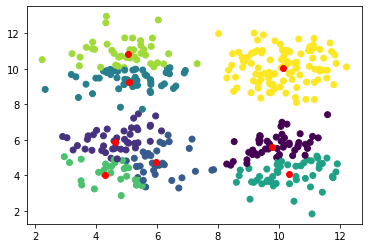

In [10]:
model = KMeans(n_clusters=8, init='random', random_state=42, max_iter=1) # 8groups

model.fit(data)

y_pred = model.predict(data)

fig, ax = plt.subplots()
ax.scatter(x=data[:, 0], y=data[:, 1], c=y_pred)
ax.scatter(x=model.cluster_centers_[:, 0], y=model.cluster_centers_[:, 1], c='r')
# 센트로이드가 4개인 경우보다 8개인 경우의 결과가 더 좋은가?
# How many clusters should we make? : there is a way (elbow method, shilhoute)

# 우리의 직관은 4개가 ideal하다고 하지만

# n_clusters=1 doesn't make sense.